<a href="https://colab.research.google.com/github/yotam-biu/stat/blob/main/tutorial11_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%load_ext autoreload
%autoreload 2

!mkdir data # Create a folder for the data in the colab
!wget https://raw.githubusercontent.com/yotam-biu/stat/main/data/RegressionData.csv -O /content/data/RegressionData.csv


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
mkdir: cannot create directory ‘data’: File exists
--2025-06-26 08:07:06--  https://raw.githubusercontent.com/yotam-biu/stat/main/data/RegressionData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1233 (1.2K) [text/plain]
Saving to: ‘/content/data/RegressionData.csv’

/content/data/Regre 100%[===================>]   1.20K  --.-KB/s    in 0s      

2025-06-26 08:07:06 (57.0 MB/s) - ‘/content/data/RegressionData.csv’ saved [1233/1233]



In [12]:
import pandas as pd
from google.colab import drive
df_base = pd.read_csv("/content/data/RegressionData.csv")
df_base = df_base.set_index("Patient ID")
df_base.head()

,glucose,age,insulin,gender,heart_rate,resp_rate,body_temp,systolic_bp,diastolic_bp,oxygen_sat,hdl,wbc_count,platelets,creatinine,hemoglobin,c_peptide
Patient ID,,,,,,,,,,,,,,,,
0,56.3,58,19.2,1,77.4,18.1,36.9,142.2,83.0,96.1,62.0,8.2,216.0,1.2,14.9,19.2
1,78.6,48,5.4,0,71.7,17.9,36.6,112.2,82.6,98.0,81.3,5.2,261.6,1.4,12.7,5.5
2,48.8,34,24.4,1,68.8,14.3,36.9,107.9,80.1,98.1,43.1,7.3,264.7,1.0,12.4,24.4
3,57.3,62,21.6,1,67.0,15.4,37.3,112.5,77.7,100.5,48.2,9.0,214.3,0.8,14.7,21.7
4,65.8,27,9.2,0,55.2,16.7,36.8,133.7,65.8,97.8,56.2,4.6,343.3,0.8,13.7,9.3


In [ ]:
selected_columns = ['age', 'gender', 'glucose', 'insulin']
df = df_base[selected_columns]
df.head()

,age,gender,glucose,insulin
Patient ID,,,,
0,58,1,56.3,19.2
1,48,0,78.6,5.4
2,34,1,48.8,24.4
3,62,1,57.3,21.6
4,27,0,65.8,9.2


In [ ]:
df.describe()

,age,gender,glucose,insulin
count,14.000000,14.000000,14.000000,14.000000
mean,44.571429,0.500000,65.528571,13.135714
std,12.125715,0.518875,10.499335,5.661830
min,27.000000,0.000000,48.600000,5.400000
25%,35.000000,0.000000,58.325000,8.825000
50%,42.500000,0.500000,66.350000,10.950000
75%,57.250000,1.000000,72.175000,16.775000
max,62.000000,1.000000,85.300000,24.400000


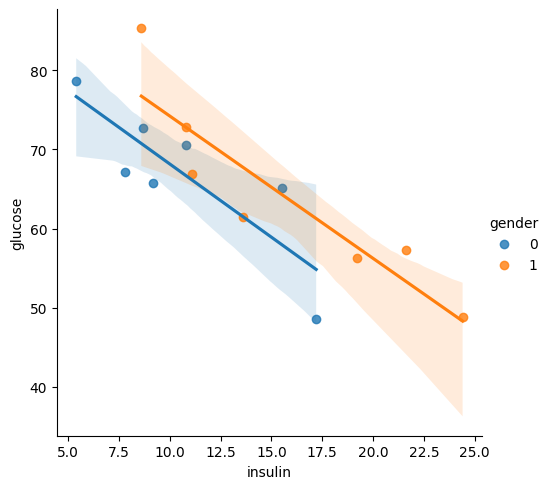

In [ ]:
import seaborn as sns
sns.lmplot(data = df,
           x = 'insulin',
           y = 'glucose',
           hue = 'gender');


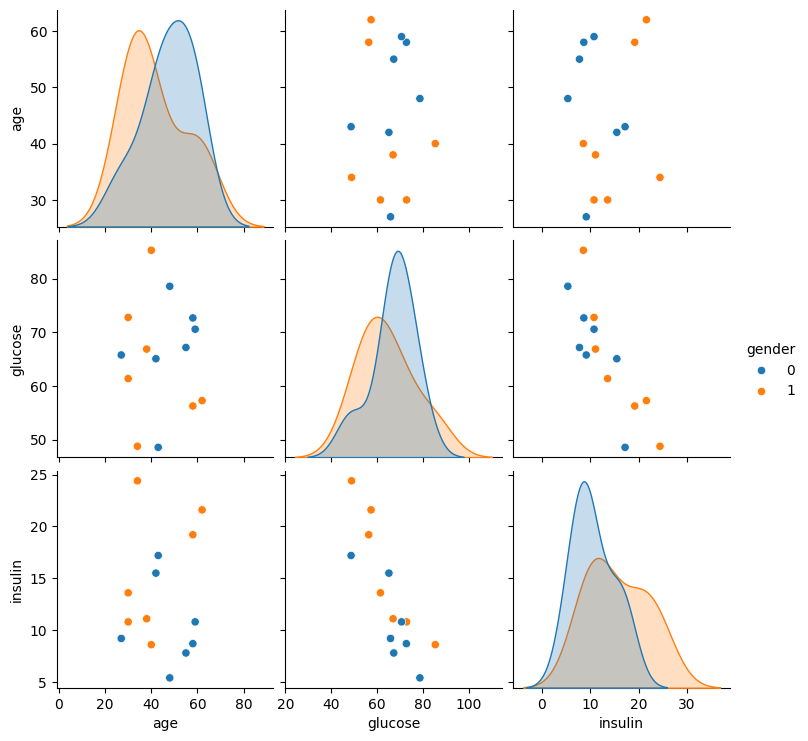

In [ ]:
import seaborn as sns
sns.pairplot(data = df, hue = 'gender')

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols(formula='glucose ~ age + insulin + gender', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                glucose   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     13.70
Date:                Thu, 26 Jun 2025   Prob (F-statistic):           0.000711
Time:                        07:51:36   Log-Likelihood:                -40.846
No. Observations:                  14   AIC:                             89.69
Df Residuals:                      10   BIC:                             92.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.4470      6.559     12.266      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)
